In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd


%matplotlib inline

In [2]:
# load the data and check the data shape

mtaRides = np.load('MTA_Fare.npy')

mtaRides.shape

(600, 23, 194)

In [3]:
# check the -1 entries in the matrix and replace with nan

mtaRides = mtaRides.astype(float)

mtaRides[mtaRides == -1] = np.nan

In [4]:
# sum time series for all stations

stasum = np.nansum(mtaRides, axis=0)
print('the station sum array shape is: %s' % (stasum.shape, ))

typsum = np.nansum(mtaRides, axis=1)
print('the card type sum array shape is: %s' % (typsum.shape, ))

allsum = np.nansum(typsum, axis=0)
print('sum for all card types and all stations is: %s' % (allsum.shape, ))

the station sum array shape is: (23, 194)
the card type sum array shape is: (600, 194)
sum for all card types and all stations is: (194,)


In [ ]:
stasum[:, 0]

In [5]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [6]:
# create the time axis for the time series

start_date = datetime.date(2010, 5, 21)
end_date = datetime.date(2014, 1, 31)

time_x = pd.date_range(start_date, end_date, freq='W-FRI')

print(start_date)
print(end_date)
print(time_x)

2010-05-21
2014-01-31
DatetimeIndex(['2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25', '2010-07-02', '2010-07-09',
               '2010-07-16', '2010-07-23',
               ...
               '2013-11-29', '2013-12-06', '2013-12-13', '2013-12-20',
               '2013-12-27', '2014-01-03', '2014-01-10', '2014-01-17',
               '2014-01-24', '2014-01-31'],
              dtype='datetime64[ns]', length=194, freq='W-FRI')


In [ ]:
# plotting the all rides from week 2010/5/21 - 2014/1/31

plt.figure(figsize=(8,8))

plt.plot(time_x, allsum)
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel("week", fontsize=20)
plt.ylabel("number of rides", fontsize=20)
plt.title('Number of Rides by Week', fontsize=30)

Fig 1 the number of rides by week from all stations and all card types. Notice the significance frop between in 2012. 

In [ ]:
# identifying the event by setting a threshold at three standard deviation away from the mean

print ("mean rides by week {:.2f}".format(allsum.mean()))
print ("stdev rides by week {:.2f}".format(allsum.std()))
thresholds = [allsum.mean() + 3 * allsum.std(), allsum.mean() - 3 * allsum.std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))

In [ ]:
# plotting the rides with threshold line

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time_x, allsum)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='k')

plt.xticks(rotation=75, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Number of Rides", fontsize=20)
plt.title('Number of Rides by Week', fontsize=25)

Fig 2. the week with three standard deviation threshold plotted. It looks like a single event have crossed the threshold. 

In [ ]:
# find the event location

print(np.where(allsum < thresholds[1]))

event_index = np.where(allsum < thresholds[1])[0][0]

print('The total rides number in the week of event is: {}'.format(allsum[event_index]))
print('The event took place in the week of: {}'.format(time_x[event_index].date()))
print('which is the week that Hurricane Sandy hit NYC : https://www.huffingtonpost.com/2013/10/28/sandy-anniversary_n_4170982.html')

## Task 2

In [ ]:
# the stasum is the the sum for all the stations for one card type for the 194 weeks
# the matrix is represented by 23 x 194 

stasum.shape

In [ ]:
# for this problem only the card types are interested. So the weighted average for rides
# for each card type is used in this case

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(stasum.shape[0]):
    ax.plot(time_x, stasum[i,:], label=ridetype[i])

plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Number of Rides", fontsize=20)
plt.title('Number of Rides by Week and by Card Types', fontsize=20)

Fig 3 the total rides by week by card types. Notice the different card types are shown in different colors. Yet, it is still difficult just by the visual to tell which card type is having a trend. 

In [ ]:
# create a transposed stasum matrix which each column will represent a type of card 

df_card = pd.DataFrame(stasum.T, index=time_x, columns=ridetype)
df_card.head()

In [ ]:
df_card.head()

In [ ]:
# create dataframe to store the rolling means and standard deviations for each card type
# using the rolling window size 10

df_rmean = pd.DataFrame()
df_rstd = pd.DataFrame()

df_rmean = df_card.rolling(window=10, center=False).mean()
df_rstd = df_card.rolling(window=10, center=False).std()

In [ ]:

df_rmean = df_card.rolling(window=10, center=False).mean()
df_rstd = df_card.rolling(window=10, center=False).std()

In [ ]:
# calculate the rolling mean and rolling standard deviation 

for i in range(df_sta.shape[1]):
    df_['r_mean'] =  df_card.iloc[:, i].rolling(window=10,center=False).mean()
    df_card['r_std'] =  df_sta.iloc[:, i].rolling(window=10,center=False).std()

In [ ]:
fig = plt.figure(figsize=(20,120))


for i in range(len(ridetype)):
    
    ax = fig.add_subplot(12, 2, i+1)
    
    # plotting the time series for each card type
    ax.plot(time_x, df_card.iloc[:, i], label=ridetype[i])
    
    # plotting the rolling mean and standard deviation for each card type
    ax.plot(time_x, df_rmean.iloc[:, i], label='rolling mean')
    
    ax.plot(time_x, df_rstd.iloc[:, i], label='rolling std')
    
    # calculate the ratio of usage for first ten weeks against last ten weeks for each card type 
    ts = df_card.iloc[:, i]
    ur = ts.iloc[10: ].mean() / ts.iloc[: -10].mean()
    
    plt.xticks(rotation=75, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel("Number of Rides", fontsize=20)
    plt.title('Card Type: {}. 10 Weeks Usage Ratio:{}'.format(ridetype[i], ur), fontsize=20)

Fig 4. Each card types time series with rolling mean and rolling standard deviation. Notice the rolling mean smoothing out the short term variation in the time series while still preserving the long term trend. The monthly card exhibits steady decline in its trend with a 0.97 ratio score and the senior card type shows a steady increase in its trend with 1.05 ratio. Notice most of the rolling standard deviation does not show great except the influence of extreme event (such as Hurricane Cindy) and also cessation of service. 

### Senior vs. Monthly

In [ ]:
ridetype

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.plot(time_x, df_card['sen'], label='Senior', linestyle='-.', alpha=0.3, c='orange')
ax.plot(time_x, df_rmean['sen'], label='Senior Rolling Mean', c='orange')

ax.plot(time_x, df_card['month'], label='Monthly', linestyle='-.', alpha=0.3, c='blue')
ax.plot(time_x, df_rmean['month'], label='Monthly', c='blue')

plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Rides', fontsize=20)
plt.title('Senior and Monthly Riderships by Week and Rolling Mean',fontsize=20)
plt.show()

Fig 5. The monthly card exhibits steady decline in its trend with a 0.97 ratio between the rides in first 10 weeks and last ten weeks and the senior card type shows a steady increase in its trend with 1.05 ratio. 

# Task 3

Text(0.5,1,'Number of Rides by Week and by Stations')

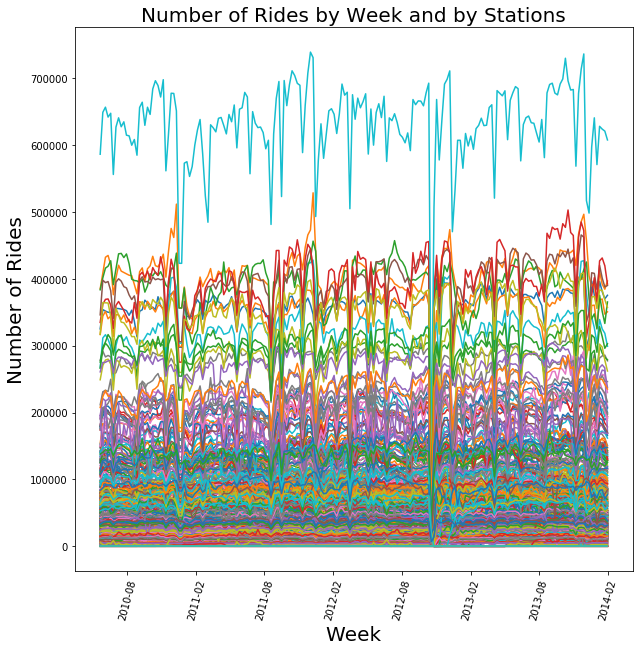

In [7]:
# plot the swipes at each stations 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(typsum.shape[0]):
    ax.plot(time_x, typsum[i,:])

plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Number of Rides", fontsize=20)
plt.title('Number of Rides by Week and by Stations', fontsize=20)

Fig 6. swipes by week at every stations. 

In [ ]:
len(typsum[0, :])

In [ ]:
N

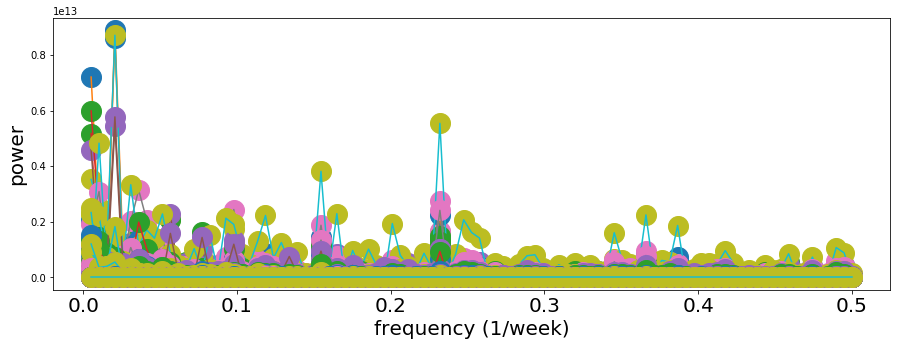

In [16]:
# now use FFT to plot the power spectrum for all station time series

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

# set the sampling rate 

N = len(time_x) 

for i in range(typsum.shape[0]):
    
    f = np.abs(np.fft.rfft(typsum[i, :]))**2
    ax.plot(np.fft.rfftfreq(N, 1.0)[1: ], (f[1: ]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1: ], (f[1: ]), '-')
    ax.set_xticklabels([ "%s"%(f) for f in ax.get_xticks()], fontsize=20)
    plt.ylabel("power", fontsize=20)
    plt.xlabel("frequency (1/week)", fontsize=20);



/Users/tedu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


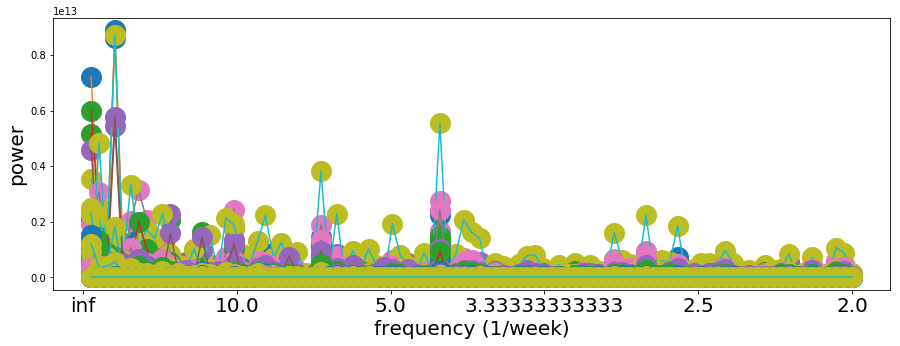

In [15]:
# now use FFT to plot the power spectrum for all station time series

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

# set the sampling rate 

N = len(time_x) 

for i in range(typsum.shape[0]):
    
    f = np.abs(np.fft.rfft(typsum[i, :]))**2
    ax.plot(np.fft.rfftfreq(N, 1.0)[1: ], (f[1: ]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1: ], (f[1: ]), '-')
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
    plt.ylabel("power", fontsize=20)
    plt.xlabel("frequency (1/week)", fontsize=20);


Note. the first interation for this not quite as interesting and also non-intuitive. As the inifinite frequencies are the first Fourier-transformation calculated. The extremely large number are interfering with the correct interpretation for the graph. So for the following steps, we are going to remove this first element. Also, to avoid confusion, we are going to plot period. This will allow us to see the pattern repeat a few weeks. 

/Users/tedu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


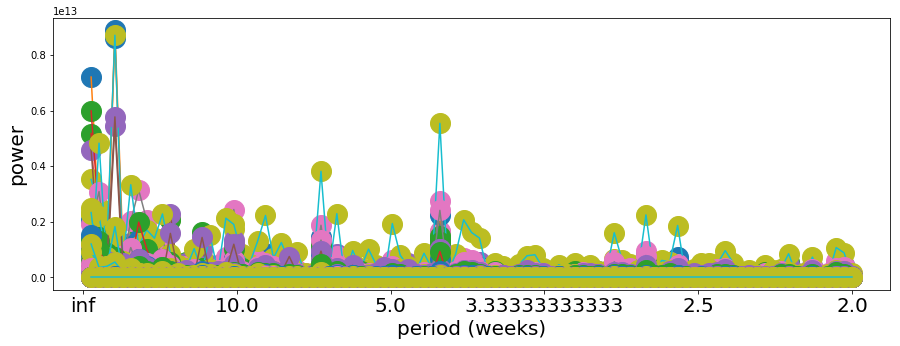

In [12]:
# now use FFT to plot the power spectrum for all station time series

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

# set the sampling rate 

N = len(time_x) 

for i in range(typsum.shape[0]):
    
    f = np.abs(np.fft.rfft(typsum[i, :]))**2
    ax.plot(np.fft.rfftfreq(N, 1.0)[1: ], (f[1: ]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1: ], (f[1: ]), '-')
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
    plt.ylabel("power", fontsize=20)
    plt.xlabel("period (weeks)", fontsize=20);

/Users/tedu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


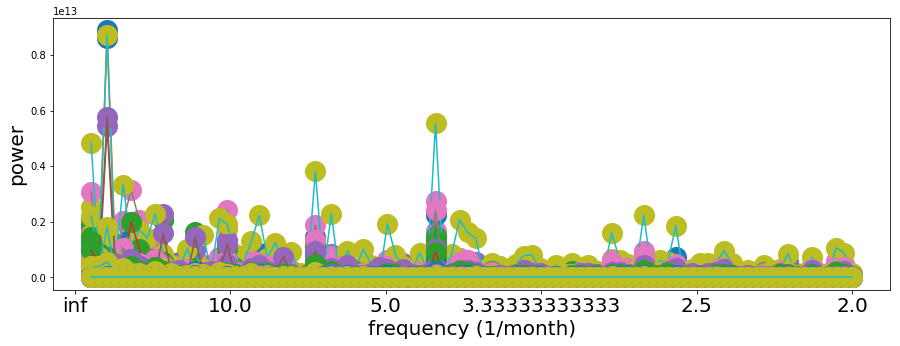

In [11]:
# now use FFT to plot the power spectrum for all station time series

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

# set the sampling rate 

N = len(time_x) 

for i in range(typsum.shape[0]):
    
    f = np.abs(np.fft.rfft(typsum[i, :]))**2
    ax.plot(np.fft.rfftfreq(N, 1.0)[2: ], (f[2: ]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[2: ], (f[2: ]), '-')
    ax.set_xticklabels([ "%s"%(1/ f) for f in ax.get_xticks()], fontsize=20)
    plt.ylabel("power", fontsize=20)
    plt.xlabel("frequency (1/month)", fontsize=20);

/Users/tedu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


NameError: name 'pl' is not defined

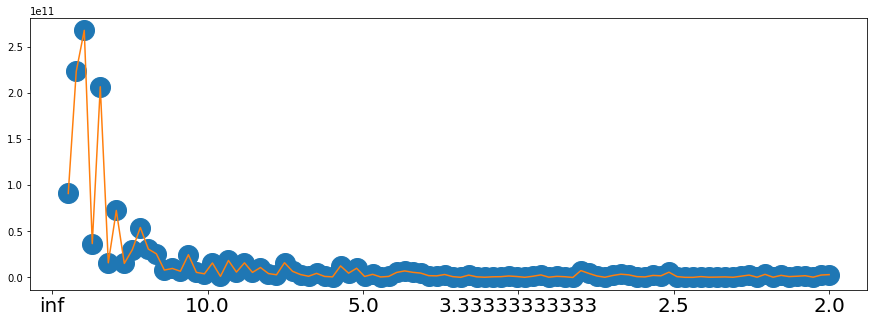

In [25]:
f = np.abs(np.fft.rfft(typsum[1, :]))**2
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[2:], (f[2:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[2:], (f[2:]), '-')
ax.set_xticklabels(["%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.ylabel("power", fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20);
pl.xlim(pl.xlim()[0], 1.0/3);

In [26]:
np.where(f[2:] == f[2:].max())[0] + 2, np.where(f[12:] == f[12:].max())[0] + 12, \
np.where(f[23:] == f[23:].max())[0] + 23

(array([4]), array([12]), array([29]))

In [27]:
print ("most important  periods: ")
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(N, 1.0)[4]))
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(N, 1.0)[12]))
print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(N, 1.0)[29]))

most important  periods: 
48.50 weeks
16.17 weeks
6.69 weeks
